In [1]:
import pandas as pd
# used for dates
import datetime
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
%config InlineBackend.figure_format='retina'
%matplotlib inline

print(f'pandas version = {pd.__version__}')

pd.Timestamp.today()

pandas version = 1.1.3


Timestamp('2021-04-27 09:54:10.301730')

In [2]:
# อ่านข้อมูลจาก Pickle

def read_pickle(files =None ):
    
    pickle_off = open(files,"rb")
    df = pickle.load(pickle_off)
    
    return df
##====================##

# เขียนข้อมูลลง Pickle

def write_pickle(data,files =None ):
    pickling_on = open(files,"wb")
    pickle.dump(data, pickling_on)
    pickling_on.close()
    print('dump success')

In [ ]:
# Reading from Clipboard.

df = pd.read_clipboard() 
df

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
date      1002 non-null object
period    1002 non-null object
volumn    1002 non-null int64
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [69]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df

,date,period,volumn
0,2020-10-26,06:00-09:00,0
1,2020-10-27,06:00-09:00,7
2,2020-10-28,06:00-09:00,6
3,2020-10-29,06:00-09:00,7
4,2020-10-30,06:00-09:00,3
...,...,...,...
997,2021-04-20,09:00-12:00,84
998,2021-04-21,09:00-12:00,79
999,2021-04-22,09:00-12:00,72
1000,2021-04-24,09:00-12:00,10


In [70]:
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Day']=df['date'].dt.day
df['DayName']=df['date'].dt.strftime('%a')
df

,date,period,volumn,Year,Month,Day,DayName
0,2020-10-26,06:00-09:00,0,2020,10,26,Mon
1,2020-10-27,06:00-09:00,7,2020,10,27,Tue
2,2020-10-28,06:00-09:00,6,2020,10,28,Wed
3,2020-10-29,06:00-09:00,7,2020,10,29,Thu
4,2020-10-30,06:00-09:00,3,2020,10,30,Fri
...,...,...,...,...,...,...,...
997,2021-04-20,09:00-12:00,84,2021,4,20,Tue
998,2021-04-21,09:00-12:00,79,2021,4,21,Wed
999,2021-04-22,09:00-12:00,72,2021,4,22,Thu
1000,2021-04-24,09:00-12:00,10,2021,4,24,Sat


In [71]:
from pandas.api.types import CategoricalDtype
cat_dayname = CategoricalDtype(categories=[ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'], ordered=True)
df['DayName']=df['DayName'].astype(cat_dayname)
df

,date,period,volumn,Year,Month,Day,DayName
0,2020-10-26,06:00-09:00,0,2020,10,26,Mon
1,2020-10-27,06:00-09:00,7,2020,10,27,Tue
2,2020-10-28,06:00-09:00,6,2020,10,28,Wed
3,2020-10-29,06:00-09:00,7,2020,10,29,Thu
4,2020-10-30,06:00-09:00,3,2020,10,30,Fri
...,...,...,...,...,...,...,...
997,2021-04-20,09:00-12:00,84,2021,4,20,Tue
998,2021-04-21,09:00-12:00,79,2021,4,21,Wed
999,2021-04-22,09:00-12:00,72,2021,4,22,Thu
1000,2021-04-24,09:00-12:00,10,2021,4,24,Sat


## Read & Write Data

In [3]:
files = 'periods.pkl'

In [ ]:
write_pickle(df,files)

In [4]:
df = read_pickle(files)
df

,date,period,volumn,Year,Month,Day,DayName
0,2020-10-26,06:00-09:00,0,2020,10,26,Mon
1,2020-10-27,06:00-09:00,7,2020,10,27,Tue
2,2020-10-28,06:00-09:00,6,2020,10,28,Wed
3,2020-10-29,06:00-09:00,7,2020,10,29,Thu
4,2020-10-30,06:00-09:00,3,2020,10,30,Fri
...,...,...,...,...,...,...,...
997,2021-04-20,09:00-12:00,84,2021,4,20,Tue
998,2021-04-21,09:00-12:00,79,2021,4,21,Wed
999,2021-04-22,09:00-12:00,72,2021,4,22,Thu
1000,2021-04-24,09:00-12:00,10,2021,4,24,Sat


# ค่าเฉลี่ยต่อวันคำนวณจากลำดับวันของสัปดาห์

In [8]:
data = df[['DayName', 'volumn']].groupby('DayName').mean().reset_index()
data

,DayName,volumn
0,Mon,30.974359
1,Tue,37.326087
2,Wed,35.313333
3,Thu,32.426667
4,Fri,31.381944
5,Sat,3.491228
6,Sun,1.353333


<AxesSubplot:xlabel='DayName', ylabel='volumn'>

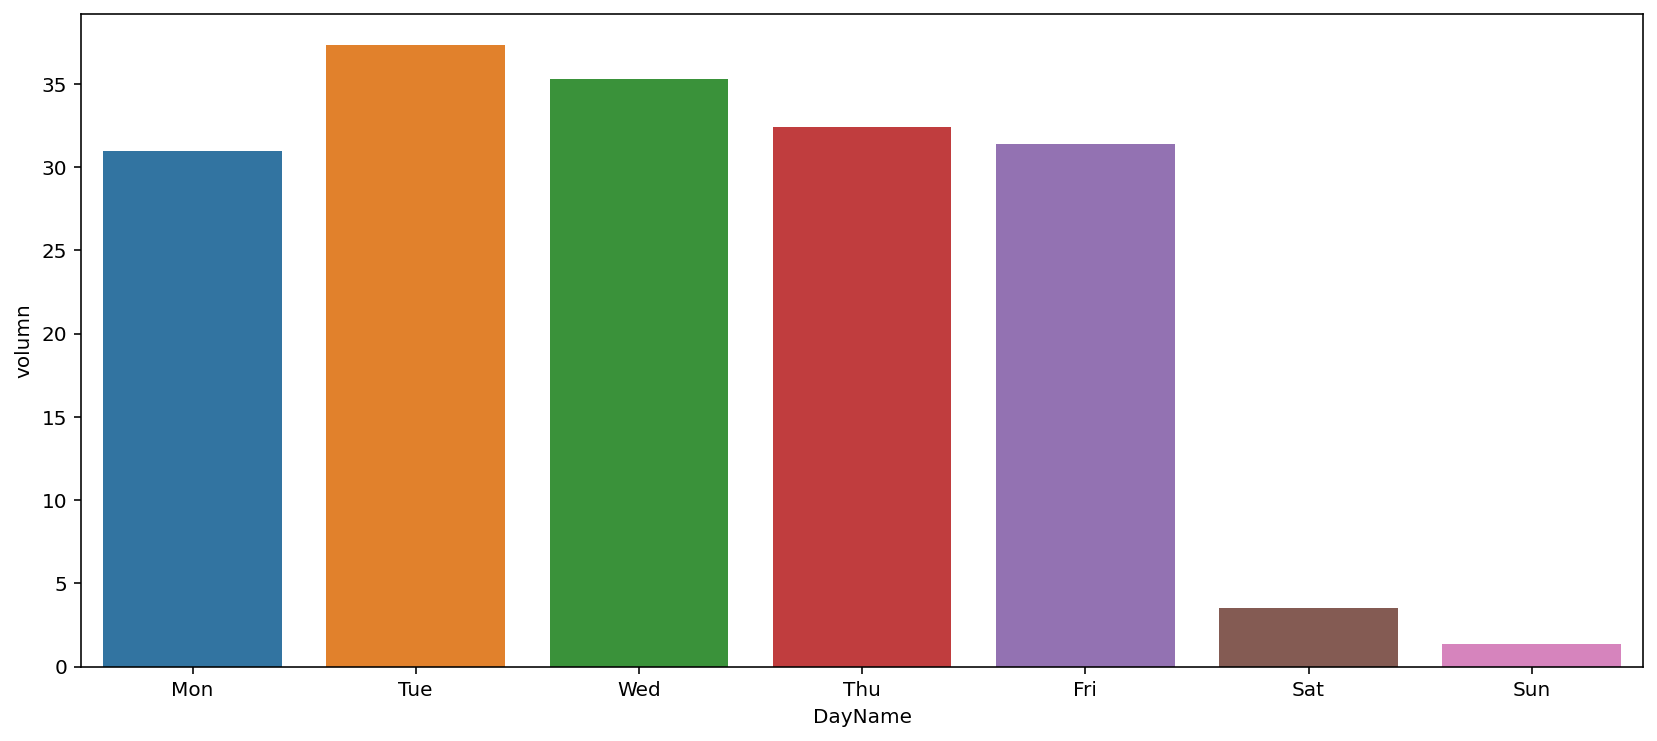

In [9]:
plt.figure(figsize=(14, 6))
sns.barplot(x='DayName',y='volumn',data=data)

## คิดเป็น %

In [10]:
data = read_pickle(files)
data = df[['DayName', 'volumn']].groupby('DayName').mean()
data = data.transform(lambda x: x/x.sum()*100)

data = data.style.highlight_max(color='red').highlight_min(color='gold')
data

,volumn
DayName,
Mon,17.980442
Tue,21.667584
Wed,20.499192
Thu,18.823498
Fri,18.217043
Sat,2.026638
Sun,0.785602


## ค่าเฉลี่ยต่อวันคำนวณจากช่วงเวลาของแต่ละวัน

In [11]:
data = df[['period', 'volumn']].groupby('period').mean().reset_index()
data

,period,volumn
0,00:00-06:00,0.155689
1,06:00-09:00,4.598802
2,09:00-12:00,52.682635
3,12:00-15:00,52.682635
4,15:00-18:00,36.113772
5,18:00-23:59,5.047904


<AxesSubplot:xlabel='period', ylabel='volumn'>

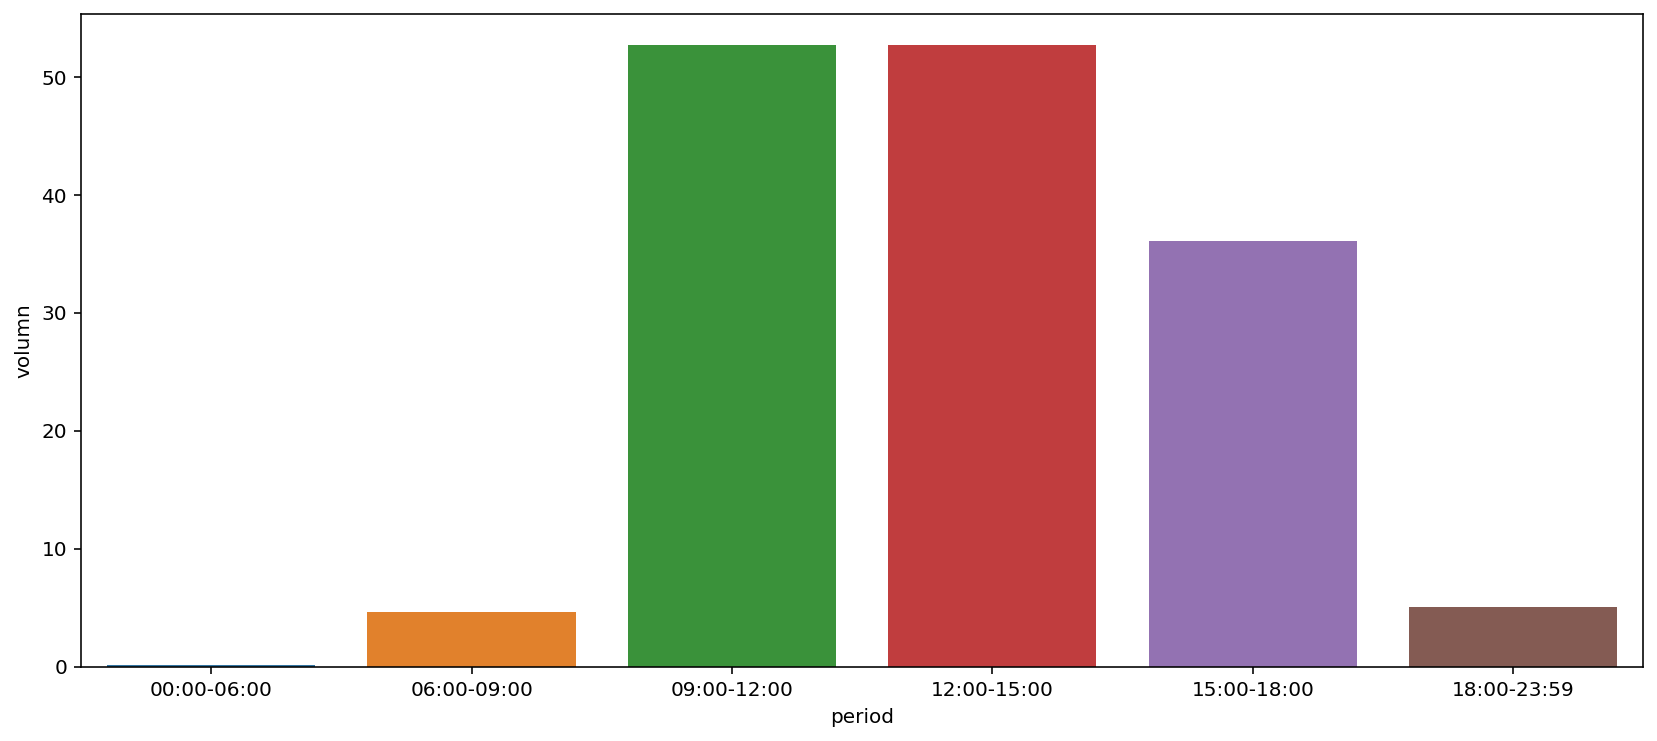

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(x='period',y='volumn',data=data)

## คิดเป็น %

In [13]:
data = read_pickle(files)
data = df[['period', 'volumn']].groupby('period').mean()
data = data.transform(lambda x: x/x.sum()*100)



data = data.style.highlight_max(color='red').highlight_min(color='gold')
data


,volumn
period,
00:00-06:00,0.102913
06:00-09:00,3.039899
09:00-12:00,34.824256
12:00-15:00,34.824256
15:00-18:00,23.871913
18:00-23:59,3.336764


## ค่าเฉลี่ยต่อวันคำนวณจากลำดับวันของสัปดาห์และช่วงเวลาของแต่ละวัน

In [14]:
data = read_pickle(files)

In [15]:
data =df.groupby(['DayName','period']).mean().reset_index()
data

,DayName,period,volumn,Year,Month,Day
0,Mon,00:00-06:00,0.000000,2020.615385,5.846154,15.038462
1,Mon,06:00-09:00,5.961538,2020.615385,5.846154,15.038462
2,Mon,09:00-12:00,65.269231,2020.615385,5.846154,15.038462
3,Mon,12:00-15:00,65.269231,2020.615385,5.846154,15.038462
4,Mon,15:00-18:00,43.115385,2020.615385,5.846154,15.038462
...,...,...,...,...,...,...
37,Sun,06:00-09:00,0.760000,2020.640000,5.720000,16.840000
38,Sun,09:00-12:00,2.880000,2020.640000,5.720000,16.840000
39,Sun,12:00-15:00,2.880000,2020.640000,5.720000,16.840000
40,Sun,15:00-18:00,1.600000,2020.640000,5.720000,16.840000


In [16]:
pv =  pd.pivot_table(data, values='volumn', aggfunc='mean', index=['DayName'], columns=['period'])
#pv = pv.sort_values(by=period, ascending=False)
pv

period,00:00-06:00,06:00-09:00,09:00-12:00,12:00-15:00,15:00-18:00,18:00-23:59
DayName,,,,,,
Mon,0.000000,5.961538,65.269231,65.269231,43.115385,6.230769
Tue,0.130435,5.652174,73.478261,73.478261,62.695652,8.521739
Wed,0.440000,7.120000,75.400000,75.400000,46.400000,7.120000
Thu,0.120000,6.160000,69.240000,69.240000,44.640000,5.160000
Fri,0.250000,4.791667,65.541667,65.541667,45.166667,7.000000
Sat,0.157895,0.894737,7.894737,7.894737,3.578947,0.526316
Sun,0.000000,0.760000,2.880000,2.880000,1.600000,0.000000


## คิดเป็น %

In [17]:
pv = pv.transform(lambda x: x/x.sum()*100)
html = pv.copy()
pv = pv.style.highlight_max(color='red').highlight_min(color='gold')
pv

period,00:00-06:00,06:00-09:00,09:00-12:00,12:00-15:00,15:00-18:00,18:00-23:59
DayName,,,,,,
Mon,0.000000,19.022069,18.145267,18.145267,17.441735,18.029460
Tue,11.875742,18.034949,20.427430,20.427430,25.362662,24.658649
Wed,40.060837,22.718487,20.961686,20.961686,18.770481,20.602553
Thu,10.925683,19.655320,19.249166,19.249166,18.058497,14.931064
Fri,22.761839,15.289244,18.221006,18.221006,18.271553,20.255319
Sat,14.375898,2.854925,2.194788,2.194788,1.447814,1.522956
Sun,0.000000,2.425007,0.800659,0.800659,0.647258,0.000000


## ค่าเฉลี่ยต่อวันคำนวณจากลำดับวันของสัปดาห์และช่วงเวลาของแต่ละวัน

In [10]:
data =df.groupby(['DayName','period']).mean().reset_index()
data

,DayName,period,volumn,Year,Month,Day
0,Mon,00:00-06:00,0.000000,2020.615385,5.846154,15.038462
1,Mon,06:00-09:00,5.961538,2020.615385,5.846154,15.038462
2,Mon,09:00-12:00,65.269231,2020.615385,5.846154,15.038462
3,Mon,12:00-15:00,65.269231,2020.615385,5.846154,15.038462
4,Mon,15:00-18:00,43.115385,2020.615385,5.846154,15.038462
...,...,...,...,...,...,...
37,Sun,06:00-09:00,0.760000,2020.640000,5.720000,16.840000
38,Sun,09:00-12:00,2.880000,2020.640000,5.720000,16.840000
39,Sun,12:00-15:00,2.880000,2020.640000,5.720000,16.840000
40,Sun,15:00-18:00,1.600000,2020.640000,5.720000,16.840000


In [11]:
pv =  pd.pivot_table(data, values='volumn', aggfunc='mean', index=['period'], columns=['DayName'])
#pv = pv.sort_values(by=period, ascending=False)
pv

DayName,Mon,Tue,Wed,Thu,Fri,Sat,Sun
period,,,,,,,
00:00-06:00,0.000000,0.130435,0.44,0.12,0.250000,0.157895,0.00
06:00-09:00,5.961538,5.652174,7.12,6.16,4.791667,0.894737,0.76
09:00-12:00,65.269231,73.478261,75.40,69.24,65.541667,7.894737,2.88
12:00-15:00,65.269231,73.478261,75.40,69.24,65.541667,7.894737,2.88
15:00-18:00,43.115385,62.695652,46.40,44.64,45.166667,3.578947,1.60
18:00-23:59,6.230769,8.521739,7.12,5.16,7.000000,0.526316,0.00


## คิดเป็น %

In [12]:
pv = pv.transform(lambda x: x/x.sum()*100)

pv = pv.style.highlight_max(color='grey').highlight_min(color='gold')
pv

DayName,Mon,Tue,Wed,Thu,Fri,Sat,Sun
period,,,,,,,
00:00-06:00,0.000000,0.058241,0.207665,0.061678,0.132773,0.753769,0.000000
06:00-09:00,3.207781,2.523782,3.360393,3.166118,2.544811,4.271357,9.359606
09:00-12:00,35.120033,32.809163,35.586181,35.587993,34.808586,37.688442,35.467980
12:00-15:00,35.120033,32.809163,35.586181,35.587993,34.808586,37.688442,35.467980
15:00-18:00,23.199503,27.994564,21.899188,22.944079,23.987608,17.085427,19.704433
18:00-23:59,3.352649,3.805086,3.360393,2.652138,3.717637,2.512563,0.000000
